<a href="https://colab.research.google.com/github/anjimeth2001/ML-Learning-/blob/main/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Import the Dataset & Quick Look around the dataset**

In [6]:
#import the dataset
import pandas as pd
data=pd.read_csv("/content/Advertising.csv", index_col=[0]) #index_col=[0] - Use the first column as the DataFrame index.
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [7]:
data.shape

(200, 4)

In [9]:
data.dtypes

,0
TV,float64
radio,float64
newspaper,float64
sales,float64


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


## **Summary Statistics**

In [18]:
data.describe()
#data[['TV','radio']].describe() #for selected specific columns.

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


For simple linear regression


*   target variable (Y): sales
*   feature (X): TV




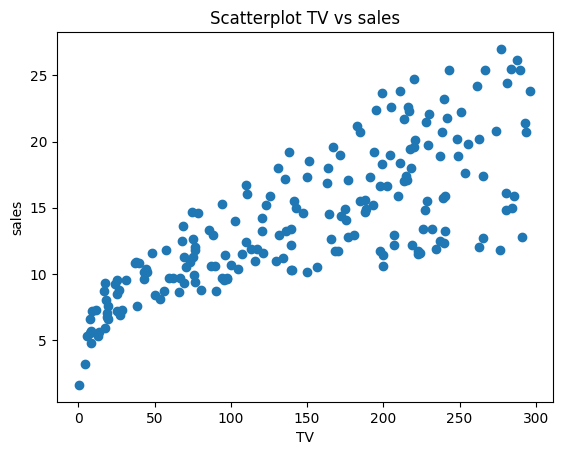

In [21]:
import matplotlib.pyplot as plt
plt.scatter(data['TV'],data['sales'])
plt.xlabel("TV")
plt.ylabel("sales")
plt.title("Scatterplot TV vs sales")
plt.show()

# *Correlation between TV and sales*

In [22]:
data['TV'].corr(data['sales'])

np.float64(0.7822244248616061)

From the correlation coefficient and sactterplot between TV and sales, we can see that independent variable linearly correlated with the dependent variable.

Fit the Simple linear regression model of sales on TV

In [28]:
from sklearn.linear_model import LinearRegression
Reg=LinearRegression() #Intiate the model

#define the response and predictor variables
x=data[['TV']]
y=data['sales']
Reg.fit(x,y) #Fit the regression model

print("Slope=", Reg.coef_)
print("Intercept=",Reg.intercept_)


Slope= [0.04753664]
Intercept= 7.032593549127695


Fitted model will be sales = 7.0326 + 0.0475*TV

Interpretation of regression parameters:

• Intercept: In absence of any TV advertising, the sales is 7,032.6 units on average.

• Slope: An additional $1,000 spent on TV advertising increases the sales by 47.5 additional units, on average.

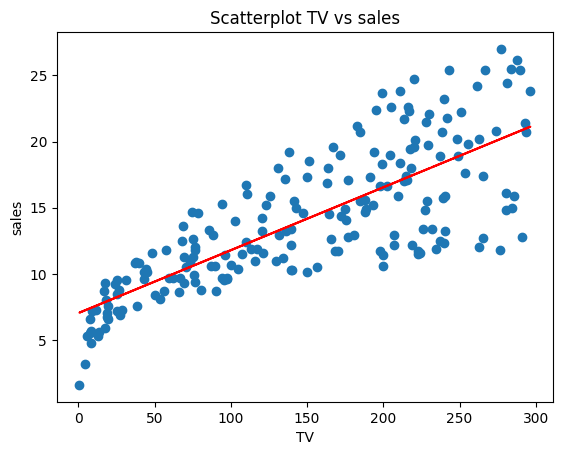

In [30]:
y_hat=Reg.predict(x)
plt.scatter(x,y)
plt.plot(x,y_hat,color='red')
plt.xlabel("TV")
plt.ylabel("sales")
plt.title("Scatterplot TV vs sales")
plt.show()

Unfortunately, `scikit-learn` doesn’t offer many built-in functions to analyze the summary of a regression model since it’s typically only used for predictive purposes.

So, if we are interested in getting model summary of a regression model in python, we use `statsmodels` package instead.

In [35]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

#Fit the Simple Linear Regression
model=ols('sales ~ TV', data=data).fit()
print(model.params)

Intercept    7.032594
TV           0.047537
dtype: float64


Anova Table

In [37]:
print(sm.stats.anova_lm(model))

             df       sum_sq      mean_sq           F        PR(>F)
TV          1.0  3314.618167  3314.618167  312.144994  1.467390e-42
Residual  198.0  2102.530583    10.618841         NaN           NaN


In [36]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Sun, 05 Oct 2025   Prob (F-statistic):           1.47e-42
Time:                        07:38:34   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.0

Prediction at a given covaraite

In [39]:
newdata = pd.DataFrame({"TV":[100, 200]})
pred = model.predict(newdata)
print(pred)

0    11.786258
1    16.539922
dtype: float64


In [40]:
# get user input
tv_value = float(input("Enter TV advertising budget: "))

# create a DataFrame for prediction
newdata = pd.DataFrame({"TV": [tv_value]})

# make prediction
pred = model.predict(newdata)

print("Predicted sales:", pred[0])

Enter TV advertising budget: 200
Predicted sales: 16.539921635731652


# Residual plot

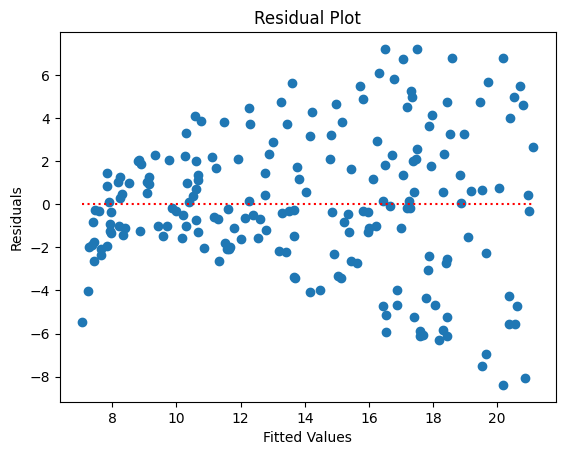

In [43]:
#fittedvalues-model.fittedvalues
#residuals-model.resid
plt.scatter(model.fittedvalues, model.resid)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.plot([min(model.fittedvalues),max(model.fittedvalues,)],[0,0],color='red',linestyle=':')
plt.show()

Plot has funnel shape. So there can be appear heteroskedasticity.(non-constant variance)

**Breusch-Pagan-For Check Homoscedasticity**

The Breusch–Pagan (BP) test is used to detect heteroscedasticity in a regression model.

H₀: Errors have constant variance (homoscedasticity) Vs H₁: Errors have non-constant variance (heteroscedasticity).

In [47]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["Lagrange multiplier statistic", "p-value", "f-value", "f p-value"]
test = sms.het_breuschpagan(model.resid, model.model.exog)
lzip(name, test)

[('Lagrange multiplier statistic', np.float64(48.037965662293615)),
 ('p-value', np.float64(4.1804559077556965e-12)),
 ('f-value', np.float64(62.591404771514306)),
 ('f p-value', np.float64(1.7618451425695676e-13))]

p value = 4.1804559077556965e-12 < 0.05 then we can reject the H0 and say that There is not a constant variance in residuals. Homoskedasticity assumption violated.


# **The White’s test** checks for heteroscedasticity (non-constant error variance) in a regression model

In [48]:
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_white

# Perform White’s Test
white_test = het_white(model.resid, model.model.exog)

# Extract results
labels = ['LM Statistic', 'LM-Test p-value', 'F-Statistic', 'F-Test p-value']
print(dict(zip(labels, white_test)))

{'LM Statistic': np.float64(52.62020588770413), 'LM-Test p-value': np.float64(3.746860060649929e-12), 'F-Statistic': np.float64(35.1682556700385), 'F-Test p-value': np.float64(8.703282032677486e-14)}


LM-Test p-value= 3.746860060649929e-12 < 0.05 so Reject H0 and we can say that there is not a constant variance.

# **Q-Q Plot for Normality**

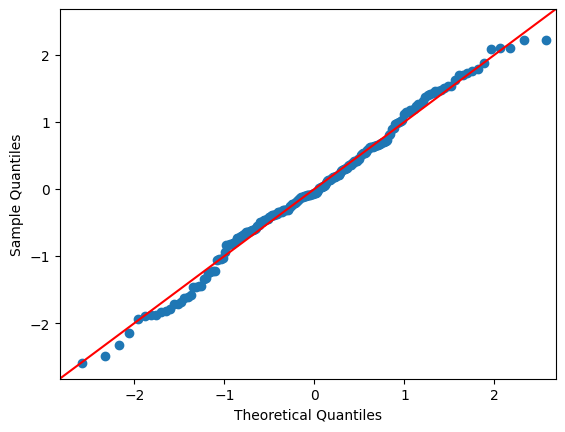

In [49]:
import scipy.stats as stats
sm.qqplot(model.resid, stats.t, fit=True ,line="45")
plt.show()

# Time Series Plot of residuals

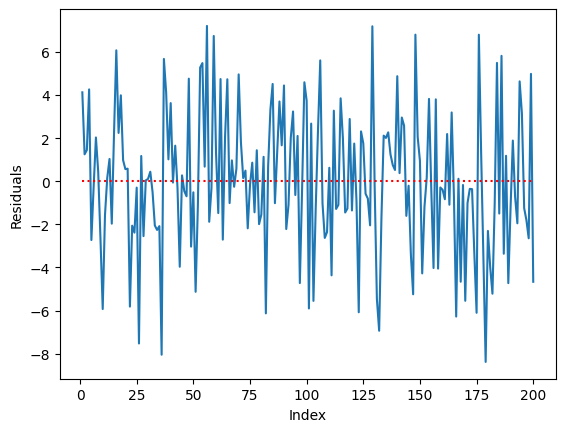

In [51]:
import numpy as np

plt.plot(model.resid)
index = np.linspace(1,200,num=200)
plt.plot([min(index),max(index)],[0,0], color = 'r', linestyle = ':')
plt.xlabel('Index')
plt.ylabel('Residuals')
plt.show()

There is random pattern in data so residuals are independent from each other.

# **Multiple Linear Regression**

In [52]:
ModelM=ols('sales~TV+radio+newspaper',data=data).fit()
print(ModelM.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sun, 05 Oct 2025   Prob (F-statistic):           1.58e-96
Time:                        08:18:04   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.0

Drop insignificant variables


In [53]:
ModelM1=ols('sales~TV+radio',data=data).fit()
print(ModelM1.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Sun, 05 Oct 2025   Prob (F-statistic):           4.83e-98
Time:                        08:20:00   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9211      0.294      9.919      0.0

Adding TV*radio interaction part to the model

In [55]:
ModelM2=ols('sales~TV+radio+TV:radio',data=data).fit()
print(ModelM2.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     1963.
Date:                Sun, 05 Oct 2025   Prob (F-statistic):          6.68e-146
Time:                        08:21:34   Log-Likelihood:                -270.14
No. Observations:                 200   AIC:                             548.3
Df Residuals:                     196   BIC:                             561.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.7502      0.248     27.233      0.0